### Preprocessing of the AGnews group

In [1]:
import numpy as np
import pickle
import pandas as pd
import sys
sys.path.append("..")


import random

random.seed(20)

In [2]:
!wget -nc https://www.di.unipi.it/~gulli/newsSpace.bz2 .
!bzip2 -d newsSpace.bz2
!rm *.bz2


--2020-02-17 09:19:37--  https://www.di.unipi.it/~gulli/newsSpace.bz2
Resolving www.di.unipi.it (www.di.unipi.it)... 131.114.73.26
Connecting to www.di.unipi.it (www.di.unipi.it)|131.114.73.26|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://groups.di.unipi.it/~gulli/newsSpace.bz2 [following]
--2020-02-17 09:19:37--  http://groups.di.unipi.it/~gulli/newsSpace.bz2
Resolving groups.di.unipi.it (groups.di.unipi.it)... 131.114.3.24
Connecting to groups.di.unipi.it (groups.di.unipi.it)|131.114.3.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118349315 (113M) [application/x-bzip2]
Saving to: ‘newsSpace.bz2’

newsSpace.bz2       100%[===================>] 112.87M  26.6MB/s    in 6.9s    

2020-02-17 09:19:44 (16.2 MB/s) - ‘newsSpace.bz2’ saved [118349315/118349315]

--2020-02-17 09:19:44--  http://./
Resolving . (.)... failed: Name or service not known.
wget: unable to resolve host address ‘.’
FINISHED --2020-02-17 

In [3]:
x = open("newsSpace", "r", encoding = "latin1")

c = 0 

data = []


temp = []

for line in x:

    splitted = line.lower().split("\t")

    if splitted[-1] == "\\n\n":
        
        temp.extend(line.lower().split("\t"))
        
        del temp[-1]
        
        data.append(temp)
        
        temp = []
        
    else:
        
        temp.extend(line.lower().split("\t"))

In [4]:
data[0]

['yahoo business',
 'http://us.rd.yahoo.com/dailynews/rss/business/*http://story.news.yahoo.com/news?tmpl=story2&u=/nm/20040814/bs_nm/column_stocks_week_dc',
 'wall st. pullback reflects tech blowout (reuters)',
 'none',
 'business',
 "reuters - wall street's long-playing drama,\\\n",
 '"waiting for google," is about to reach its final act, but its\\\n',
 'stock market debut is ending up as more of a nostalgia event\\\n',
 'than the catalyst for a new era.',
 '5',
 '0000-00-00 00:00:00']

In [5]:
data = dict(enumerate(data))

In [6]:
headers = "source\t\turl\t\ttitle\t\timage\t\tcategory\t\trank\t\ttime\t\tdescription"

keys = headers.split("\t\t")

new_data = []

for i, doc in data.items():
    
    
    temp = doc.copy()
    
    row = {}
    
    row["source"] = temp[0]
    
    del temp[0]
    
    row["url"] = temp[0]
 
    del temp[0]
    
    row["title"] = temp[0]
    
    del temp[0]
    
    row["image"] = temp[0]
    
    del temp[0]
    
    row["category"] = temp[0]
    
    del temp[0]
    
    row["rank"] = temp[-2]
    
    del temp[-2]
    
    row["time"] = temp[-1]
    
    del temp[-1]
    
    text = " ".join(temp)
    
    row["description"] = text
    
    if (row["category"] == "world") or (row["category"] == "business"):
    
        new_data.append(row)


In [7]:
row

{'category': 'top news',
 'description': 'steven kazmierczak had been taking three drugs prescribed for him by his psychiatrist, the northern illinois university gunman\'s girlfriend told cnn. jessica baty said her boyfriend of two years had been taking xanax, used to treat anxiety, and ambien, a sleep agent, as well as the antidepressant prozac.\\\n <p><a href="http://rss.cnn.com/~a/rss/cnn_topstories?a=f8vefk"><img src="http://rss.cnn.com/~a/rss/cnn_topstories?i=f8vefk" border="0"></img></a></p><div class="feedflare">\\\n <a href="http://rss.cnn.com/~f/rss/cnn_topstories?a=bmuceae"><img src="http://rss.cnn.com/~f/rss/cnn_topstories?i=bmuceae" border="0"></img></a> <a href="http://rss.cnn.com/~f/rss/cnn_topstories?a=mojf2qe"><img src="http://rss.cnn.com/~f/rss/cnn_topstories?i=mojf2qe" border="0"></img></a> <a href="http://rss.cnn.com/~f/rss/cnn_topstories?a=acodt4e"><img src="http://rss.cnn.com/~f/rss/cnn_topstories?i=acodt4e" border="0"></img></a> <a href="http://rss.cnn.com/~f/rss/

In [8]:
import csv

with open("agnews_data.csv", 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(new_data)

In [9]:
data = pd.read_csv("agnews_data.csv",sep = "," ,  error_bad_lines=False)

In [10]:
data = data[["category", "description"]]

In [11]:
data.head(1).description.values


array(['reuters - wall street\'s long-playing drama,\\\n "waiting for google," is about to reach its final act, but its\\\n stock market debut is ending up as more of a nostalgia event\\\n than the catalyst for a new era.'],
      dtype=object)

In [12]:
business = data[data["category"] == "business"] 
world = data[data["category"] == "world"] 

In [13]:
len(world), len(business)

(151220, 138211)

In [14]:
business = business.sample(36000)
world = world.sample(36000)

In [15]:
all_b = list(zip(business["description"], business["category"]))
all_w = list(zip(world["description"], world["category"]))

In [16]:
all_b = [(x, 0) for (x,y) in all_b]

all_w = [(x, 1) for (x,y) in all_w]

x_filtered, y = zip(*all_b + all_w)

from sklearn.model_selection import train_test_split as tt_split

x_traindev, x_test, y_traindev, y_test = tt_split(x_filtered, y, test_size=0.055, random_state=13478, stratify=y)

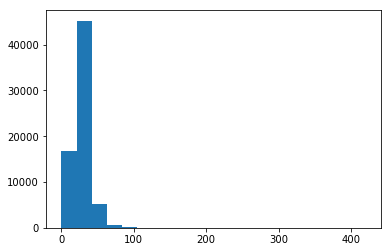

In [17]:
import matplotlib.pyplot as plt

lengths = [len(str(x).split()) for x in x_traindev if len(str(x).split()) < 500]

plt.hist(lengths, bins = 20)

plt.show()

In [18]:
np.unique(y_test, return_counts=True), np.unique(y_traindev, return_counts=True)

((array([0, 1]), array([1980, 1980])), (array([0, 1]), array([34020, 34020])))

In [19]:
from sklearn.model_selection import train_test_split as tt_split

x_train, x_dev, y_train, y_dev = tt_split(x_traindev, y_traindev, test_size=0.105, random_state=13478, stratify=y_traindev)

In [20]:
np.unique(y_train, return_counts=True), np.unique(y_dev, return_counts=True),np.unique(y_test, return_counts=True)

((array([0, 1]), array([30448, 30447])),
 (array([0, 1]), array([3572, 3573])),
 (array([0, 1]), array([1980, 1980])))

In [21]:
from preprocess_bc import cleaner

In [22]:
x_train_filt = [cleaner(str(doc))for doc in x_train]
x_dev_filt = [cleaner(str(doc)) for doc in x_dev]
x_test_filt = [cleaner(str(doc)) for doc in x_test]

In [23]:
x_train_filt[0]

['delegates',
 'from',
 'the',
 'world',
 "'s",
 'top',
 'polluting',
 'nations',
 'are',
 'meeting',
 'in',
 'washington',
 'to',
 'discuss',
 'tackling',
 'climate',
 'change',
 '.']

In [24]:
texts = { 'train' : x_train_filt, 'test' : x_test_filt, 'dev' : x_dev_filt }
labels = { 'train' : y_train, 'test' : y_test, 'dev' : y_dev }

In [25]:
import pandas as pd
df_texts = []
df_labels = []
df_exp_splits = []

for key in ['train', 'test', 'dev'] :
    df_texts += [str(" ".join(ls[1:-1])) for ls in texts[key]]
    df_labels += labels[key]
    df_exp_splits += [key] * len(texts[key])
    
df = pd.DataFrame({'text' : df_texts, 'label' : df_labels, 'exp_split' : df_exp_splits})

df["text"] = df["text"].astype(str)
df.to_csv('agnews_dataset.csv', index=False)

In [26]:
df.head(10)

,exp_split,label,text
0,train,1,from the world 's top polluting nations are me...
1,train,1,government has announced that forces loyal to ...
2,train,0,"sees its pension fund deficit hit qqq , and wi..."
3,train,0,"commerzbank , stung by its foray into the vola..."
4,train,0,
5,train,0,of the media have been speculating on a variet...
6,train,0,fine anount to $ qqq from $ qqq million in qqq
7,train,1,man armed with a suitcase full of knives fatal...
8,train,1,"quot;i am a journalist . qqq dying , qqq dying..."
9,train,1,"news , kinshasa - the united nations is invest..."


In [27]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([30448, 30447])), (array([0, 1]), array([1980, 1980])))

In [28]:
from preprocess_bc import extract_vocabulary_

word_to_ix = extract_vocabulary_(min_df = 5, dataframe = df)

In [29]:
df["text"] = df["text"].apply(lambda x: ("<SOS> " + x + " <EOS>").split())

### Forming our vocabulary, ixing data and saving it

In [30]:
from preprocess_bc import text_to_seq

ix_to_word = {v:k for k,v in word_to_ix.items()}

train_ix = text_to_seq(df[df.exp_split == "train"][["text","label"]].values, word_to_ix)
dev_ix = text_to_seq(df[df.exp_split == "dev"][["text","label"]].values, word_to_ix)
test_ix = text_to_seq(df[df.exp_split == "test"][["text","label"]].values, word_to_ix)

In [31]:
from preprocess_bc import pretrained_embeds, DataHolder_BC

pre = pretrained_embeds('glove.840B.300d', ix_to_word)
pretrained = pre.processed()

Found  13713  words out of  14573


In [32]:
data = DataHolder_BC(train_ix, dev_ix, test_ix, word_to_ix, embeds =  pretrained)

In [33]:
import pickle

pickle.dump(data, open("data.p", "wb"))

In [34]:
!rm newsSpace